In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import random
import numpy as np
import sys
sys.path.insert(0, 'C:/Users/xavid/Documents/GitHub/xnap-project-ed_group_01')
from utils.utils import convert_bbox_to_yolo

45 -4
130 -5
47 1
30 -1


105 6
47 23


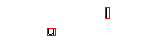

55 0
118 -2
40 -3
2 3
57 0


1 4
103 3
43 -1
28 -3
36 1
67 1


0 -5
32 -2
49 -3


In [3]:
fonts = ["Arial.ttf", "calibri.ttf", "corbel.ttf", "courbd.ttf", "segoepr.ttf"]
list_char = "123456789abcdefghijklmnopqrstuvwxyz"

for i in range(5):
    with open(f"./labels/{i}.txt", "w") as file:

        size = (random.randint(100, 150), random.randint(20,40))
        img = Image.new(mode="RGB", size=size, color='white')
        font = fonts[random.randint(0, len(fonts)-1)]
        font = ImageFont.truetype(f'C:/Windows/Fonts/{font}', random.randint(15,25))

        for j in range(random.randint(2, 6)):
            char_index = random.randint(0, len(list_char)-1)
            char = list_char[char_index]
            bbox = list(font.getbbox(char))
            
            
            width_box = bbox[2]-bbox[0]
            height_box = bbox[3]-bbox[1]

            x = random.randint(-bbox[0],size[0]-bbox[0]-width_box) 
            y = random.randint(-bbox[1],size[1]-bbox[1]-height_box)
            print(x,y)
            draw = ImageDraw.Draw(img)
            draw.text((x,y), char, font=font, fill = "black")

            bbox[0] =  max(0, bbox[0] +x)
            bbox[2] = min(size[0], bbox[2] +x)
            bbox[1] = max(0, bbox[1] +y)
            bbox[3] = min(size[1], bbox[3] +y)
            
            draw.rectangle(bbox, None, "#f00")

            bbox_yolo = convert_bbox_to_yolo(bbox, size[0], size[1])
            file.write(f"{char_index} {bbox_yolo[0]} {bbox_yolo[1]} {bbox_yolo[2]} {bbox_yolo[3]}\n")
        file.close()
        display(img)
        img.save(f"./images/{i}.jpg")
        